# The diffraction limit of a telescope

In [14]:
import numpy as np
#a
def simpsonsRule(func,a,b,N):
    x = np.linspace(a,b,N)
    h = (b-a)/(N/2)
    I = (h/3)*(func(a)+func(b))
    
    for n in range(1,N-1):
        if N%2==0:
            I += 4*h/3*func(x[n]) 
        else:
            I += 2*h/3*func(x[n])
        
    return h*I

In [15]:
#b
def integrand(theta,m,x):
    return np.cos(m*theta - x * np.sin(theta))
    

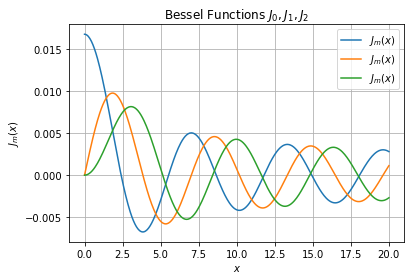

In [16]:
import matplotlib.pyplot as plt
#c
def besselFunction(m, x, N=1000):
    return (1 / np.pi) * simpsonsRule(lambda theta: integrand(theta, m, x), 0, np.pi, N)

xValues = np.linspace(0, 20, 400)
for m in range(3):
    plt.plot(xValues, [besselFunction(m, x) for x in xValues], label=f'$J_{{m}}(x)$')

plt.legend()
plt.title('Bessel Functions $J_0, J_1, J_2$')
plt.xlabel('$x$')
plt.ylabel('$J_m(x)$')
plt.grid(True)
plt.show()

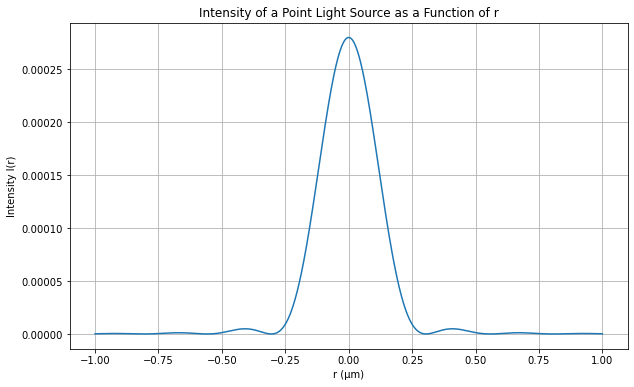

In [18]:
#d
import matplotlib.pyplot as plt

def intensity(r, lambda_nm=500, N=1000):
    lambdaUm = lambda_nm * 1e-3
    k = 2 * np.pi / lambdaUm
    
    intensityValues = np.where(r != 0, (2 * besselFunction(1, k * r, N) / (k * r))**2, 0.25)
    return intensityValues

rValues = np.linspace(-1, 1, 1000) 

intensityValues = intensity(np.abs(rValues))

plt.figure(figsize=(10, 6))
plt.plot(rValues, intensityValues)
plt.title('Intensity of a Point Light Source as a Function of r')
plt.xlabel('r (µm)')
plt.ylabel('Intensity I(r)')
plt.grid(True)
plt.show()

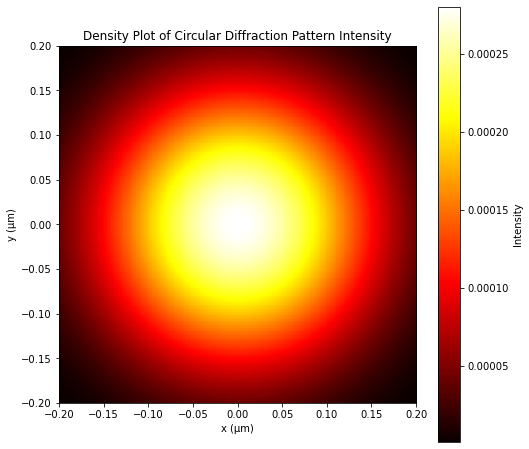

In [20]:
#e
width = 0.4
M = 100
spacing = width / M

x = np.linspace(-width / 2, width / 2, 2 * M)
y = np.linspace(-width / 2, width / 2, 2 * M)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)

Intensity = intensity(R)

plt.figure(figsize=(8, 8))
plt.imshow(Intensity, extent=(-width/2, width/2, -width/2, width/2), cmap='hot', interpolation='nearest', origin='lower')
plt.colorbar(label='Intensity')
plt.title('Density Plot of Circular Diffraction Pattern Intensity')
plt.xlabel('x (µm)')
plt.ylabel('y (µm)')
plt.show()